### Прогнозирование доходов по данным переписи США

Набор данных включает следующие 13 переменных:

- age = возраст человека в годах
- workclass = классификация рабочего статуса человека (работает ли человек на федеральное правительство, работает на местное правительство, работает без оплаты и т.д.)
- education = уровень образования человека (например, 5-6 классы, выпускник средней школы, доктор философии и т.д.)
- maritalstatus = семейное положение человека
- occupation = тип работы, которую выполняет человек (например, административная / канцелярская работа, сельское хозяйство / рыболовство, торговля и т. д.)
- relationship = отношение человека к его / ее семье
- race = индивидуальная гонка
- sex = пол человека
- capitalgain = прирост капитала человека (от продажи актива, такого как акции или облигации, по цене, превышающей первоначальную покупную цену)
- Capitalloss = потери капитала человека (от продажи актива, такого как акции или облигации, по цене ниже первоначальной покупной цены)
- hoursperweek = количество часов, которые человек работает в неделю
- nativecountry = родная страна человека
- over50k = заработал ли человек более 50 000 долларов США

Цель: проанализровать по данным кто получает сейчас 50 и >50т в год, спрогнозировать количество людей кот буду получать >50т в год, найти корреляции 

In [123]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

%matplotlib inline

In [125]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import dexplot as dxp

In [126]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [6]:
df = pd.read_csv('census.csv')

In [7]:
df.head()

age          workclass   education        maritalstatus  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek   nativecountry over50k  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [8]:
df.shape

(31978, 13)

#### построение гистограмм для анализа базы данных
Общие данные по целе:

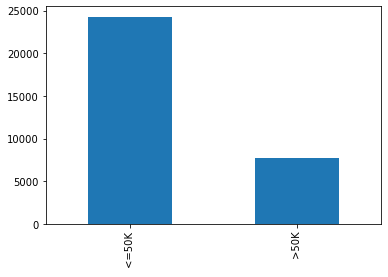

In [5]:
df['over50k'].value_counts().plot(kind='bar')

Как видими примерно 75% не получают зп выше 50т в год и 25% получают

### аналаз по половому признаку

In [6]:
#посмотрим сколько у нас мужчин и сколько женщин в базе
df['sex'].value_counts()

 Male      21370
 Female    10608
Name: sex, dtype: int64

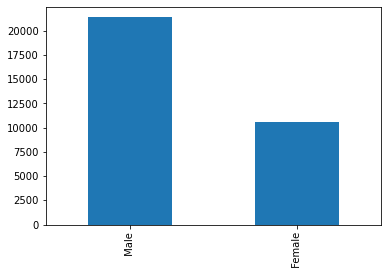

In [7]:
df['sex'].value_counts().plot(kind='bar')

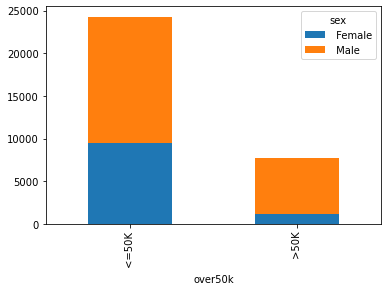

In [8]:
#посмотрим сколько мужчин и женщин сейчас получают >50т в год. 

pd.crosstab(df['over50k'],df['sex']).plot(kind="bar",stacked=True)

явно мужчин зарабатывающих 50т и выше больше

тех кто не зарабатывает примерно одинаковое кол-во

### анализ возрастного распределения

In [9]:
print('max возраст:', df['age'].max())
print('min возраст:', df['age'].min())

max возраст: 90
min возраст: 17


In [176]:
#средний возраст по полу

df.groupby(by=['sex'])['age'].mean()


sex
 Female    36.852564
 Male      39.436032
Name: age, dtype: float64

у нас есть данные о 32т людей в возрасте от 17 до 90 лет

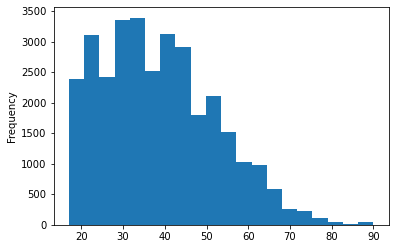

In [10]:
df['age'].plot(kind='hist', stacked=True, bins=20)


In [61]:
df["age"].iplot(kind="histogram", bins=10, theme="white", title="Ages",xTitle='Ages', yTitle='Count')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



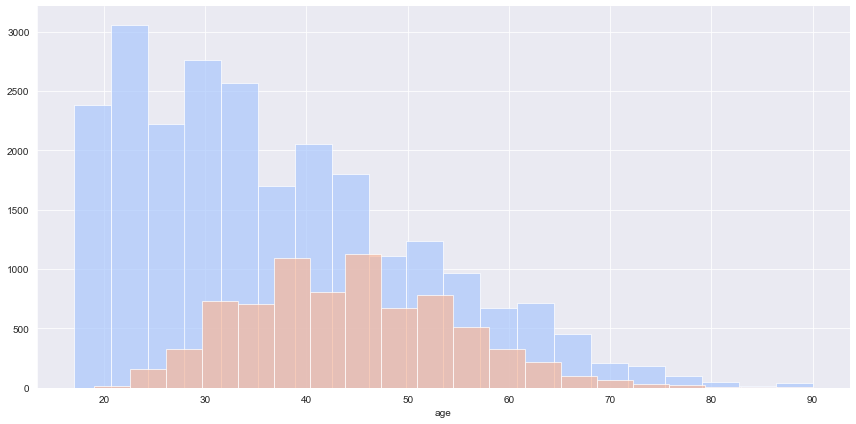

In [9]:
sns.set_style ('darkgrid')
g = sns.FacetGrid(df, hue='over50k', palette = 'coolwarm', size = 6, aspect = 2)
g = g.map (plt.hist, 'age', bins = 20, alpha = 0.7)


мы видим равномерное распределение среди "over50k" и график со смещением вправо среди "<=50k".
Также что больше кол-во людей зарабатывают over50k в возросте 40-50лет.
И с возрастом идет спад уровня дохода среди обеих групп




### анализ  распределения по образованию

In [73]:
df["education"].value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: education, dtype: int64

In [66]:
df["education"].iplot(kind="histogram", bins=20, theme="white", title="education",xTitle='education', yTitle='Count')


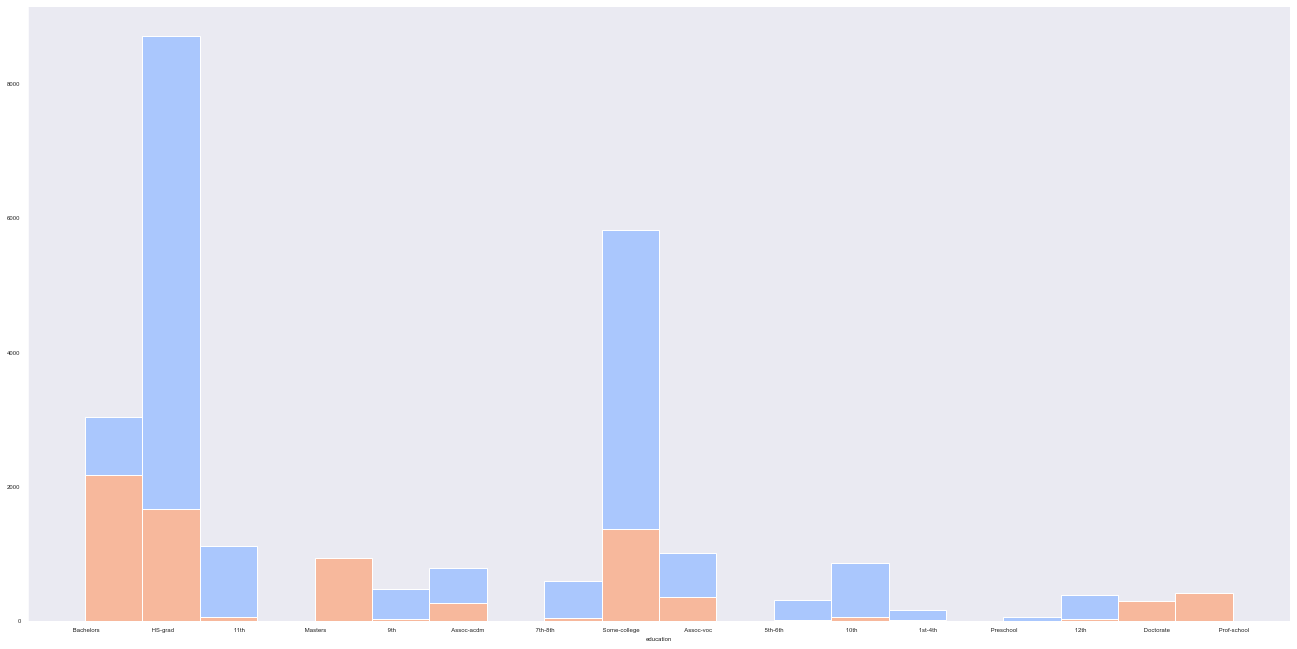

In [76]:
sns.set_style ('dark')
g = sns.FacetGrid(df, hue='over50k', palette = 'coolwarm', size = 9, aspect = 2)
g = g.map (plt.hist, 'education', bins = 20, alpha = 1)


среди бакалавров (Bachelors) видим что больше тех кто получает over50K

выпускник средней школы (HS-Grad) много тех кто зарабатывает меньше чем 50K, но по графику чуть уступает бакалаврам кол-во тех кто полачет over50K

Докторантура (Doctorate), магистры (Masters) и профильные школы (Prof-school) отмеченны только как те кто получает over50K

Профильные школы - 70% среди группы и 1.75% среди общей массы - это узкие специалисты

Колледжи - 20% среди группы получают over50K, но больше тех кто получают невысокие зп


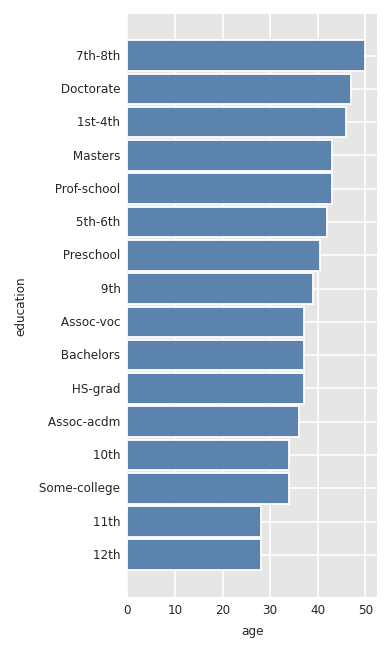

In [48]:
dxp.bar(x='age', y='education', data=df, aggfunc='median', 
        orientation='h', sort_values='desc')

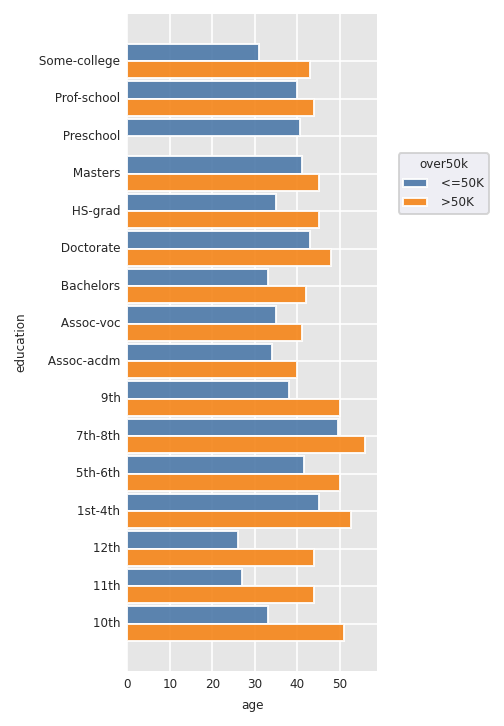

In [49]:
dxp.bar(x='age', y='education', data=df, aggfunc='median', 
        orientation='h', split='over50k')

### Семейный статус
separated - живут отдельно, но официально не разведены

divorced - офиц разведены

widowed - овдовевшие

Married-civ-spouse - Женатый гражданский супруг соответствует гражданскому супругу

Married-AF-spouse - Женатый гражданский супруг является супругом в Вооруженных силах

Married-spouse-absent - супруг отсутствует не живет рядом по причине работы 

In [174]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [80]:
df["maritalstatus"].iplot(kind="histogram", bins=20, theme="white", title="maritalstatus", yTitle='Count')


У нас две колонки самы большие - те кто никогда не был женат 10500человек  и женатые 14700 (гражданский супруг)

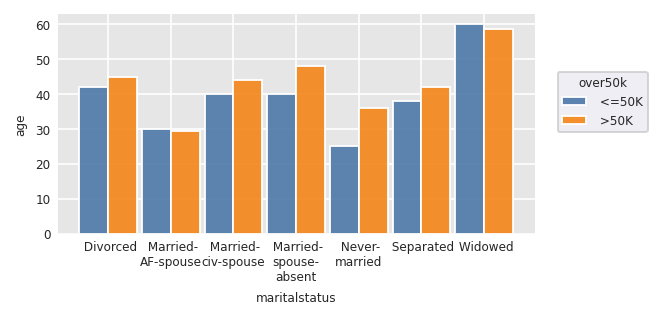

In [53]:
dxp.bar(x='maritalstatus', y='age', data=df, aggfunc='median', split='over50k')

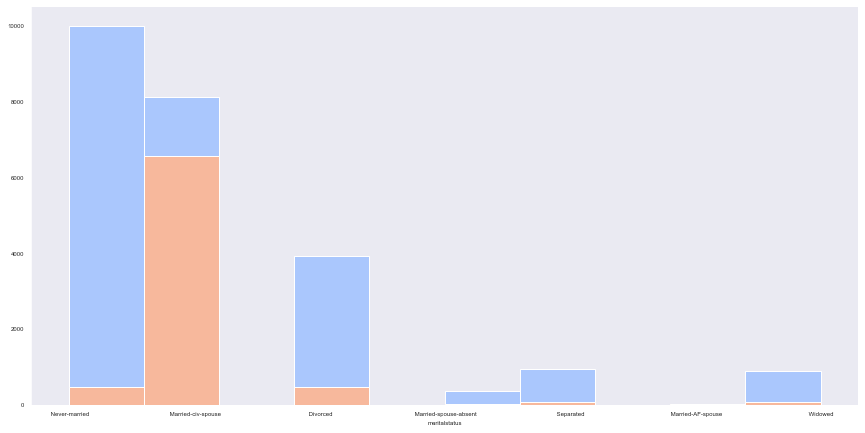

In [60]:
sns.set_style ('dark')
g = sns.FacetGrid(df, hue='over50k', palette = 'coolwarm', size = 6, aspect = 2)
g = g.map (plt.hist, 'maritalstatus', bins = 10, alpha = 1)



- колонка женатые:  внутри группы же разделение примерно 80/20 (тех кто зарабатывают их больше)
- те кто никогда не был женат: среди этой группы 95% тех кто не получает и всего 5% которые получают; в рамках общего числа людей получают всего 1,5% (это очень маленький процент, но так как колонка большая то я его рассмотрела)
- колонка разведенные (divorced) это 13% от общего числа (внутри группы 10% тех кто получают зп больше 50т в год и большее кол-во тех кто не получают)


### Тип занятости человека

Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.


In [79]:
df["workclass"].iplot(kind="histogram", bins=20, theme="white", title="workclass", yTitle='Count')


Частные компании (Private)  70% занято людей в этом классе (22т людей)

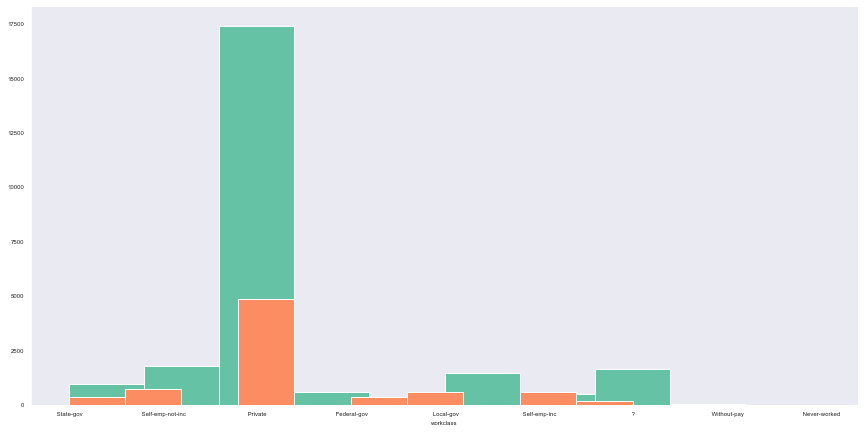

In [83]:
sns.set_style ('dark')
g = sns.FacetGrid(df, hue='over50k', palette = 'Set2', size = 6, aspect = 2)
g = g.map (plt.hist, 'workclass', bins = 10, alpha = 1)


- Частные компании (Private) от общего числа людей 15% - получают зп выше 50т в год это 4800т людей и 17400 не получают
- Самозанятые (self employment - объединила в отчете две группы not-inc и -inc) которые работают на себя или других в юридических лицах. это 10 % от общего числа опрошенных и это гдето 4% людей кот получают зп выше 50т в год
- Self-emp-inc (1074 человек,  из них 600 получают)
- Self-emp-not-inc  (2499 человек, из них 714 получают)
около 6% людей работают в местных админ центрах (2000т человек, из них 600 человек получают это 1,9%)
- 3% федеральных (943 человек, из них 365 получают)

In [87]:
df["occupation"].iplot(kind="histogram", bins=20, theme="white", title="occupation", yTitle='Count')


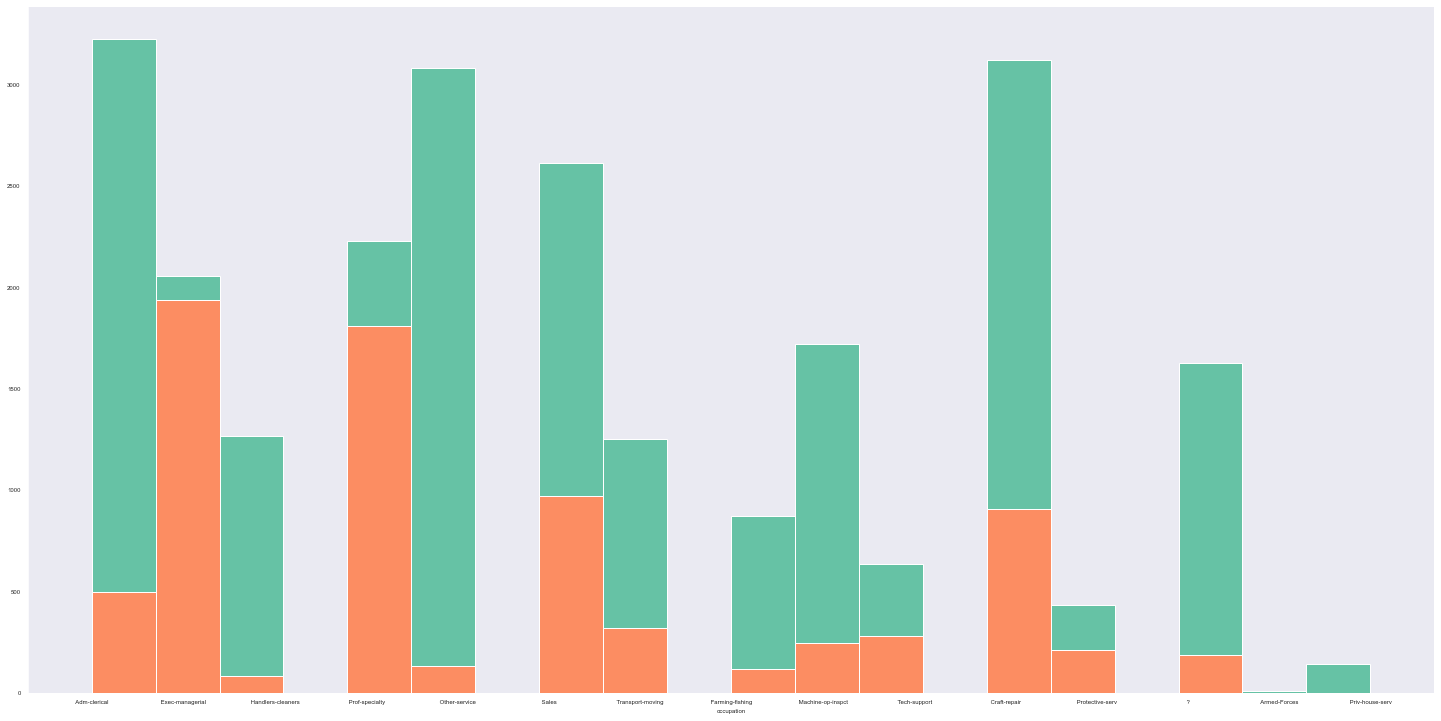

In [115]:
sns.set_style ('dark')
g = sns.FacetGrid(df, hue='over50k', palette = 'Set2', size = 10, aspect = 2)
g = g.map (plt.hist, 'occupation', bins = 20, alpha = 1)


Топ - менеджер (executive management) - 90% получают зп over50k

Профильные специальности (prof-specialty) - 70% получают зп over50k

Административные должности (admin-clerical), услуги (other service), ремонт (craft repair) - должности где занято по 4т людей, и зп over50K получают сейчас от 10 до 20%

Продажи (sales) - 3500 указало своей профессией, и в ней 40% получают over50K



### Часы работы в недель (hoursperweek)

In [116]:
df["hoursperweek"].iplot(kind="histogram", bins=20, theme="white", title="workclass", yTitle='Count')


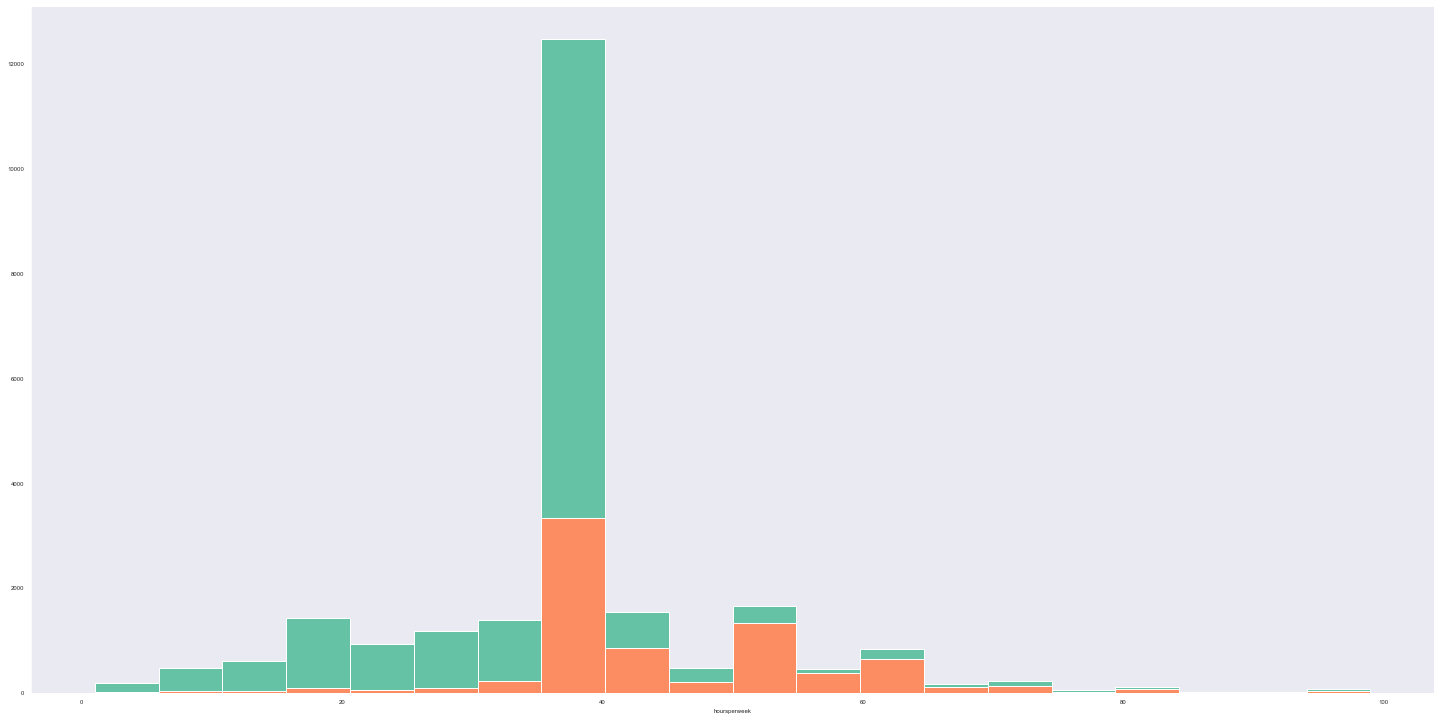

In [121]:
sns.set_style ('dark')
g = sns.FacetGrid(df, hue='over50k', palette = 'Set2', size = 10, aspect = 2)
g = g.map (plt.hist, 'hoursperweek', bins = 20, alpha = 1)


In [178]:
df.hoursperweek.describe()

count    31978.000000
mean        40.417850
std         12.345285
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

среднее время работы - 40 ч в неделю (8 часов в день);
мин часы работы - 1 час, а макс 99 час (надо посмотреть что это и возможно почистить данные)


In [183]:
df.sort_values(by='hoursperweek',ascending=False).head()

age          workclass      education        maritalstatus  \
6490    27            Private        HS-grad   Married-civ-spouse   
19376   34        Federal-gov      Doctorate        Never-married   
18272   33   Self-emp-not-inc      Assoc-voc             Divorced   
21823   45            Private   Some-college             Divorced   
24900   65            Private        Masters        Never-married   

              occupation    relationship    race      sex  capitalgain  \
6490    Transport-moving         Husband   White     Male            0   
19376     Prof-specialty   Not-in-family   White   Female            0   
18272      Other-service       Unmarried   White   Female            0   
21823       Craft-repair       Unmarried   White     Male            0   
24900     Prof-specialty   Not-in-family   White     Male            0   

       capitalloss  hoursperweek   nativecountry over50k  
6490             0            99   United-States   <=50K  
19376            0            99   United-States   <=50K  
18272            0            99   United-States   <=50K  
21823            0            99   United-States   <=50K  
24900            0            99   United-States   <=50K

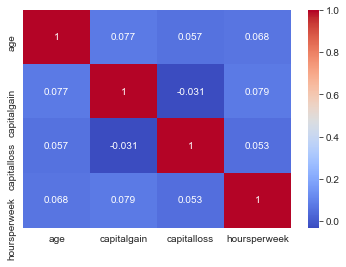

In [171]:
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm')

In [172]:
df.corr(method ='pearson') 

age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.077490     0.057282      0.068299
capitalgain   0.077490     1.000000    -0.031499      0.079112
capitalloss   0.057282    -0.031499     1.000000      0.053106
hoursperweek  0.068299     0.079112     0.053106      1.000000

### Prediction

In [188]:
# использую кодировщика данных для категориальных дынных

label_encoder=preprocessing.LabelEncoder()

In [191]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education']= label_encoder.fit_transform(df['education'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['nativecountry']= label_encoder.fit_transform(df['nativecountry'])
df['over50k']= label_encoder.fit_transform(df['over50k'])
df['maritalstatus']= label_encoder.fit_transform(df['maritalstatus'])


In [193]:
X=df.drop('over50k',axis=1)

In [194]:
Y=df['over50k']

#### LogisticRegression

In [209]:
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

In [210]:
# создание объекта логистической регрессии 

model_log=LogisticRegression()

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.6, random_state=42)

In [212]:
# обучаем модель с помощью обучающих наборов данных

model_log.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [213]:
# сохраняем коэффициенты 

model_log.coef_

array([[ 1.26601244e-02, -9.37558377e-02,  2.05270234e-02,
        -3.20539913e-01,  2.02037690e-02, -3.66268860e-01,
        -6.69495985e-02,  5.72793472e-02,  3.54769303e-04,
         7.40106177e-04,  1.69927138e-02, -3.39029073e-02]])

In [220]:
# создаем объект лог.предсказания

y_predictions = model_log.predict(X_test)
y_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [203]:
model_log.score
model_log.score(X_train,y_train)

0.8031428348057228

In [204]:
model_log.coef_
model_log.score(X_test,y_test)

0.7979882211914316

In [217]:
# оценка качества прогнозов 
from sklearn import metrics

In [223]:
result = metrics.classification_report(y_test,y_predictions)
print(result)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     14557
           1       0.69      0.29      0.41      4630

    accuracy                           0.80     19187
   macro avg       0.75      0.63      0.64     19187
weighted avg       0.78      0.80      0.77     19187



In [221]:
metrics.confusion_matrix(y_test, y_predictions)

array([[13954,   603],
       [ 3273,  1357]])

In [222]:
metrics.accuracy_score(y_test,y_predictions)

0.7979882211914316

#### DecisionTreeClassifier

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
decision_tree=DecisionTreeClassifier(random_state=0,max_depth=2)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [208]:
y_prediction_tree=decision_tree.predict(X_test)
y_prediction_tree

array([0, 1, 0, ..., 0, 0, 0])

#### random forest

In [214]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [215]:
rf.score(X_train,y_train)

0.798452036588226